# MACHINE LEARNING

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [228]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [229]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [230]:
df = pd.read_csv("improved_ecommerce_dataset.csv")

In [231]:
df

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothes,Nike,Jacket,1,Used,264,92,High,0,13,5,2.64,20096.89
496,Stationery,Pilot,Ball Pen,2,Used,575,90,High,0,10,35,11.50,1093.01
497,Stationery,Bic,Stapler,5,New,53,16,High,0,8,7,2.65,1636.19
498,Clothes,H&M,Sneakers,5,New,605,94,High,0,10,11,30.25,32539.61


## Split Data for Train and Test

In [234]:
train, test = train_test_split(df, test_size=0.2, random_state=123)

In [235]:
print(df.shape)
print(train.shape)
print(test.shape)

(500, 13)
(400, 13)
(100, 13)


In [236]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
199,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
450,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
231,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
95,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
54,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
476,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
322,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
382,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Reset the train index

In [238]:
train.reset_index(drop=True, inplace=True)

In [242]:
train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Phone,Apple,Redmi Note 11,5,Used,722,22,High,0,8,36,36.10,258730.50
1,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2482.30
2,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,8585.11
3,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,1971.96
4,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,1434.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Phone,Tecno,Galaxy A23,2,Used,230,86,High,12,14,25,4.60,157871.49
396,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47,1787.39
397,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08,4356.42
398,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66,13125.90


## Check the data type

In [249]:
train.dtypes

Category               object
Brand                  object
Product_Name           object
Rating                  int64
Condition              object
Num_Reviews             int64
Stock                   int64
Material_Quality       object
Warranty_Months         int64
Delivery_Time_Days      int64
Discount_Percent        int64
Popularity_Score      float64
Price                 float64
dtype: object

In [251]:
train.columns

Index(['Category', 'Brand', 'Product_Name', 'Rating', 'Condition', 'Num_Reviews', 'Stock', 'Material_Quality', 'Warranty_Months', 'Delivery_Time_Days', 'Discount_Percent', 'Popularity_Score', 'Price'], dtype='object')

## Check the missing values

In [254]:
train.isnull().sum()

Category              0
Brand                 0
Product_Name          0
Rating                0
Condition             0
Num_Reviews           0
Stock                 0
Material_Quality      0
Warranty_Months       0
Delivery_Time_Days    0
Discount_Percent      0
Popularity_Score      0
Price                 0
dtype: int64

## Check the dupliactes

In [257]:
train.duplicated().sum()

0

## Check and remove the outliers

In [260]:
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data = data[data[var] < upper]
    data = data[data[var] > lower]
    data.reset_index(drop=True, inplace=True)
    return data

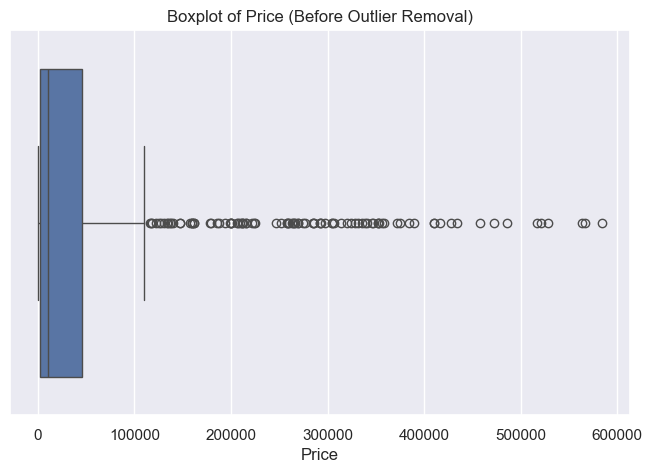

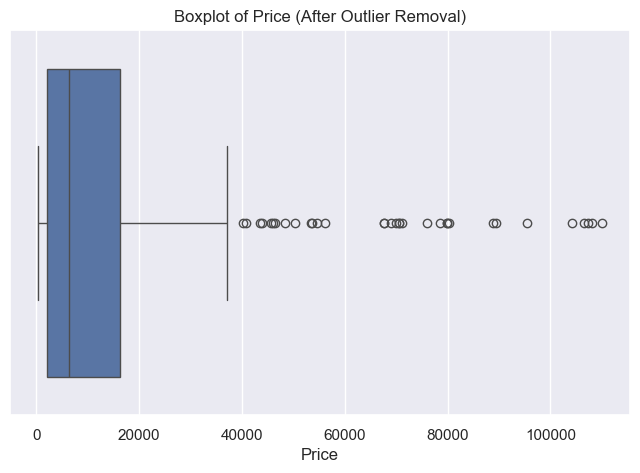

Original rows: 500, Rows after outlier removal: 403


In [262]:
# Plot boxplot for the 'Price' column before removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price (Before Outlier Removal)')
plt.show()

# Compute IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Plot boxplot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Price'])
plt.title('Boxplot of Price (After Outlier Removal)')
plt.show()

# Optional: See how many rows were removed
print(f"Original rows: {len(df)}, Rows after outlier removal: {len(df_no_outliers)}")


In [264]:
train = drop_outlier(train, "Price")

In [266]:
train.shape

(318, 13)

## Split data into features and targets

In [269]:
target = "Price"
X_train = train.drop(target, axis=1)    # Features
y_train = train[target]                 # Target

In [271]:
X_train

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54
...,...,...,...,...,...,...,...,...,...,...,...,...
313,Stationery,Bic,Marker,3,Used,240,42,High,0,8,41,7.20
314,Utensils,Cuisinart,Frying Pan,1,New,847,97,High,24,5,48,8.47
315,Utensils,Pigeon,Kettle,3,New,836,11,High,6,11,29,25.08
316,Clothes,H&M,Jacket,2,New,183,31,Medium,0,7,33,3.66


In [273]:
y_train

0       2482.30
1       8585.11
2       1971.96
3       1434.76
4       4715.80
         ...   
313     2207.48
314     1787.39
315     4356.42
316    13125.90
317     6481.97
Name: Price, Length: 318, dtype: float64

In [275]:
df

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price
0,Stationery,Faber-Castell,Notebook,1,Used,102,52,Low,0,11,28,1.02,370.48
1,Clothes,Uniqlo,Jeans,4,Used,372,24,High,0,6,2,14.88,2788.69
2,Clothes,Adidas,Jacket,4,New,276,33,High,0,10,11,11.04,9658.62
3,Clothes,Nike,Hoodie,4,New,58,42,Medium,0,12,27,2.32,2444.37
4,Phone,Tecno,Redmi Note 11,5,Used,562,55,Medium,6,5,2,28.10,410332.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothes,Nike,Jacket,1,Used,264,92,High,0,13,5,2.64,20096.89
496,Stationery,Pilot,Ball Pen,2,Used,575,90,High,0,10,35,11.50,1093.01
497,Stationery,Bic,Stapler,5,New,53,16,High,0,8,7,2.65,1636.19
498,Clothes,H&M,Sneakers,5,New,605,94,High,0,10,11,30.25,32539.61


## Features Engineering

In [278]:
#FE 1.
X_train["Price_per_Review"] = round(y_train / X_train["Num_Reviews"], 2)

In [280]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52


In [282]:
#FE 2.
X_train["Discount_Amount"] = round((X_train["Discount_Percent"] / 100) * y_train, 2)

In [284]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05


In [286]:
#FE 3.
X_train["Popularity_Per_Review"] = round(X_train["Popularity_Score"] / X_train["Num_Reviews"], 2)

In [288]:
X_train.head()

,Category,Brand,Product_Name,Rating,Condition,Num_Reviews,Stock,Material_Quality,Warranty_Months,Delivery_Time_Days,Discount_Percent,Popularity_Score,Price_per_Review,Discount_Amount,Popularity_Per_Review
0,Stationery,Staples,Ball Pen,2,Used,879,19,High,0,5,21,17.58,2.82,521.28,0.02
1,Clothes,Uniqlo,Hoodie,1,Used,171,45,Medium,0,11,41,1.71,50.21,3519.90,0.01
2,Stationery,Bic,Ball Pen,4,Used,252,52,High,0,8,14,10.08,7.83,276.07,0.04
3,Stationery,Faber-Castell,Marker,5,New,324,4,High,0,8,15,16.20,4.43,215.21,0.05
4,Utensils,Pigeon,Frying Pan,2,Used,627,92,Medium,24,11,13,12.54,7.52,613.05,0.02


In [290]:
X_train.drop(["Num_Reviews"], axis=1, inplace=True)
X_train.drop(["Discount_Percent"], axis=1, inplace=True)


In [292]:
cat_feat = []
for i in X_train.columns:
    if X_train[i].dtypes == "O":
        cat_feat.append(i)

num_feat = []
for i in X_train.columns:
    if X_train[i].dtype == "int64" or X_train[i].dtype == "float64":
        num_feat.append(i)

In [294]:
cat_feat

['Category', 'Brand', 'Product_Name', 'Condition', 'Material_Quality']

In [296]:
num_feat

['Rating',
 'Stock',
 'Warranty_Months',
 'Delivery_Time_Days',
 'Popularity_Score',
 'Price_per_Review',
 'Discount_Amount',
 'Popularity_Per_Review']

<Axes: >

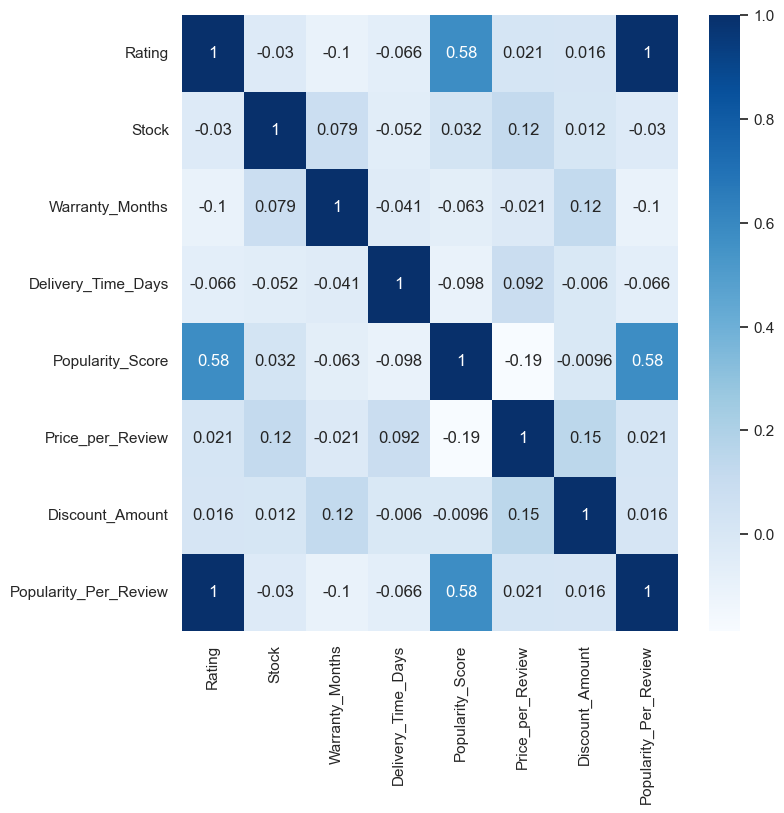

In [298]:
plt.figure(figsize = (8,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot=True, cmap = "Blues")

# Features Encoding

In [301]:
encoder = OneHotEncoder(drop= "first", dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat_feat, axis=1, inplace=True)


In [303]:
## To aviod data leakage
X_train.drop("Popularity_Score", axis=1, inplace=True)

## Features Importance

In [306]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = X_train.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Category_Phone,5.862276e-01
Price_per_Review,2.183551e-01
Discount_Amount,9.641811e-02
Delivery_Time_Days,2.623231e-02
Category_Utensils,2.574590e-02
Warranty_Months,1.581523e-02
Category_Stationery,6.759267e-03
Stock,5.919249e-03
Condition_Used,4.019903e-03
Product_Name_Jacket,2.550831e-03


In [308]:
res = coef.to_frame()
res.head(5).index

Index(['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Delivery_Time_Days', 'Category_Utensils'], dtype='object')

In [310]:
top_5 = ['Category_Phone', 'Price_per_Review', 'Discount_Amount', 'Category_Utensils', 'Delivery_Time_Days']

In [312]:
X_train_n = X_train[top_5]

In [314]:
X_train_n

,Category_Phone,Price_per_Review,Discount_Amount,Category_Utensils,Delivery_Time_Days
0,0,2.82,521.28,0,5
1,0,50.21,3519.90,0,11
2,0,7.83,276.07,0,8
3,0,4.43,215.21,0,8
4,0,7.52,613.05,1,11
...,...,...,...,...,...
313,0,9.20,905.07,0,8
314,0,2.11,857.95,1,5
315,0,5.21,1263.36,1,11
316,0,71.73,4331.55,0,7


In [338]:
def prepare(d):
    
    d.reset_index(drop=True, inplace=True)

    d = drop_outlier(d, "Price")
    
    target = "Price"
    X_d = d.drop(target, axis=1)    # Features
    y_d = d[target]  

    if "Num_Reviews" in X_d.columns:
        X_d["Price_per_Review"] = round(y_d / X_d["Num_Reviews"], 2)

    if "Discount_Percent" in X_d.columns:
        X_d["Discount_Amount"] = round((X_d["Discount_Percent"] / 100) * y_d, 2)

    if "Popularity_Score" in X_d.columns and "Num_Reviews" in X_d.columns:
        X_d["Popularity_Per_Review"] = round(X_d["Popularity_Score"] / X_d["Num_Reviews"], 2)

    X_d.drop(["Num_Reviews"], axis=1, inplace=True)
    X_d.drop(["Discount_Percent"], axis=1, inplace=True)

    
    encoder = OneHotEncoder(drop= "first", dtype=int)

    enc_data = pd.DataFrame(encoder.fit_transform(X_d[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_d = X_d.join(enc_data)

    X_d.drop(cat_feat, axis=1, inplace=True)

    X_d.drop("Popularity_Score", axis=1, inplace=True)

    X_d_n = X_d[top_5]

    return X_d_n, y_d

In [340]:
print(X_train.columns)


Index(['Rating', 'Stock', 'Warranty_Months', 'Delivery_Time_Days', 'Price_per_Review', 'Discount_Amount', 'Popularity_Per_Review', 'Category_Phone', 'Category_Stationery', 'Category_Utensils', 'Brand_Apple', 'Brand_Bic', 'Brand_Cuisinart', 'Brand_Faber-Castell', 'Brand_H&M', 'Brand_Hawkins', 'Brand_Infinix', 'Brand_Nike', 'Brand_Paper Mate', 'Brand_Pigeon', 'Brand_Pilot', 'Brand_Prestige', 'Brand_Samsung', 'Brand_Staples', 'Brand_Tecno', 'Brand_Tefal', 'Brand_Uniqlo', 'Brand_Xiaomi',
       'Brand_Zara', 'Product_Name_Camon 20', 'Product_Name_Cooking Pot', 'Product_Name_Cutlery Set', 'Product_Name_Frying Pan', 'Product_Name_Galaxy A23', 'Product_Name_Hoodie', 'Product_Name_Hot 30', 'Product_Name_Jacket', 'Product_Name_Jeans', 'Product_Name_Kettle', 'Product_Name_Marker', 'Product_Name_Notebook', 'Product_Name_Pressure Cooker', 'Product_Name_Redmi Note 11', 'Product_Name_Ruler', 'Product_Name_Sneakers', 'Product_Name_Stapler', 'Product_Name_T-Shirt',
       'Product_Name_iPhone 13', 'Co

In [342]:
X_test, y_test = prepare(test)

In [344]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
  if input_ml_algo == 'DT':
     model = DecisionTreeRegressor()
  elif input_ml_algo == 'RF':
     model = RandomForestRegressor()
  elif input_ml_algo == 'XGBC':
     model = XGBRegressor()
  elif input_ml_algo=='LR':
     model=LinearRegression()
  elif input_ml_algo=='KNN':
    model=KNeighborsRegressor()
  elif input_ml_algo=='GBR':
     model= GradientBoostingRegressor()
  return model

def evaluate(model):
  y_train_pred = model.predict(X_train_n) #Train (Already seen this)
  y_pred = model.predict(X_test)
  print('Train r2 score: ', r2_score(y_train,y_train_pred))
  print('Test r2 score: ', r2_score(y_test, y_pred))

  print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
  print('test_mse1: ', mean_squared_error(y_test,y_pred))
  plt.subplots(figsize=(8,5))
  plt.scatter(y_test,y_pred)
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))
  (np.unique(y_test)),c='r')
  plt.title('Predicted vs Actual')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.grid()
  plt.show()


Train r2 score:  1.0
Test r2 score:  0.7024430720647602
train_mse1:  0.0
test_mse1:  218570013.69489512


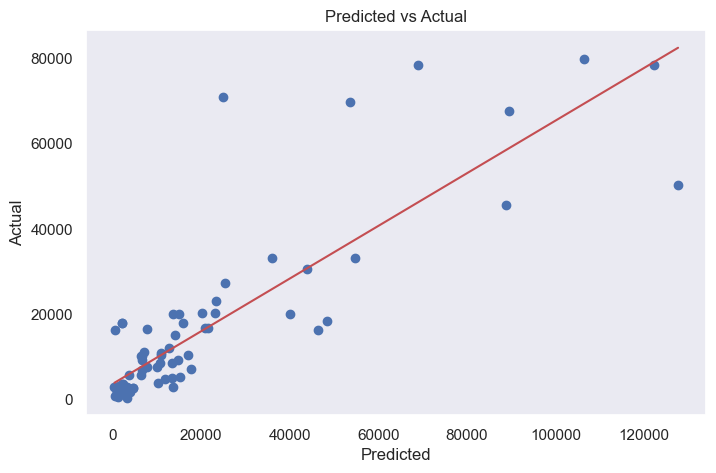

In [346]:
model1 = model_to_use("DT")
model1.fit(X_train_n, y_train)
evaluate(model1)

Train r2 score:  0.9662674379028889
Test r2 score:  0.7483888051061499
train_mse1:  8496697.56455629
test_mse1:  184820641.53353122


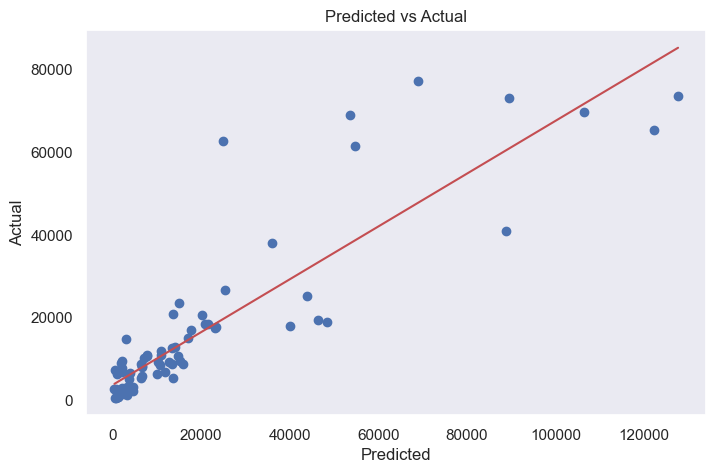

In [348]:
model2 = model_to_use("RF")
model2.fit(X_train_n, y_train)
evaluate(model2)

Train r2 score:  0.9999826439292673
Test r2 score:  0.6875316743721619
train_mse1:  4371.719038132204
test_mse1:  229523159.43576849


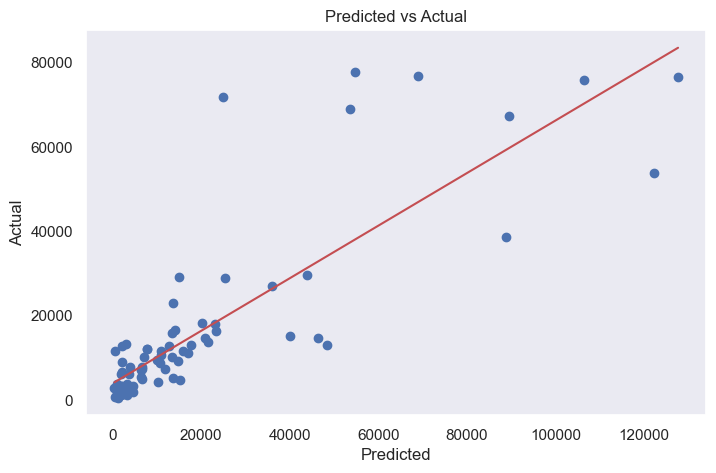

In [349]:
model3 = model_to_use("XGBC")
model3.fit(X_train_n, y_train)
evaluate(model3)

Train r2 score:  0.7407422981328173
Test r2 score:  0.6827023888316577
train_mse1:  65302904.585359395
test_mse1:  233070504.1877424


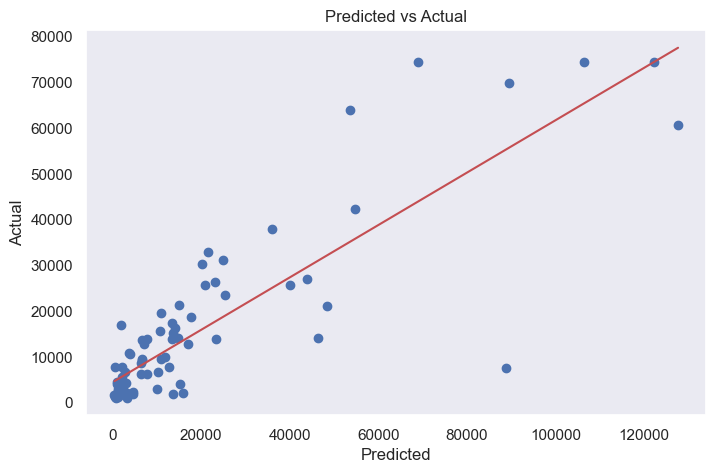

In [351]:
model4 = model_to_use("LR")
model5.fit(X_train_n, y_train)
evaluate(model5)

Train r2 score:  0.9634120836120313
Test r2 score:  0.7264450418324297
train_mse1:  9215916.038955927
test_mse1:  200939401.30342105


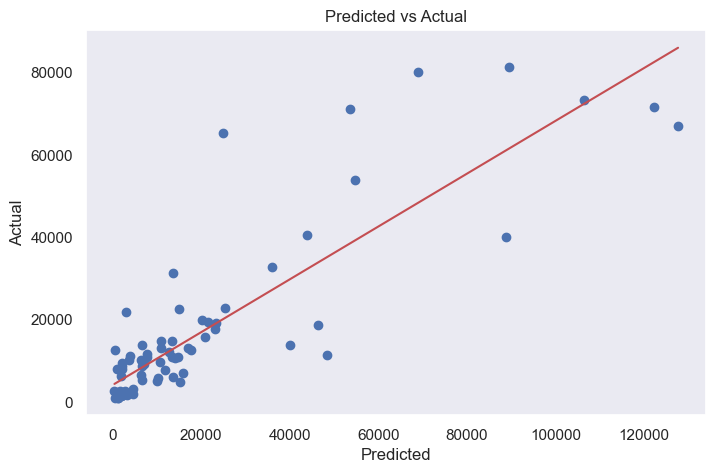

In [354]:
model5 = model_to_use("KNN")
model6.fit(X_train_n, y_train)
evaluate(model6)

Train r2 score:  0.9634120836120313
Test r2 score:  0.7271297237277617
train_mse1:  9215916.038955925
test_mse1:  200436469.2013934


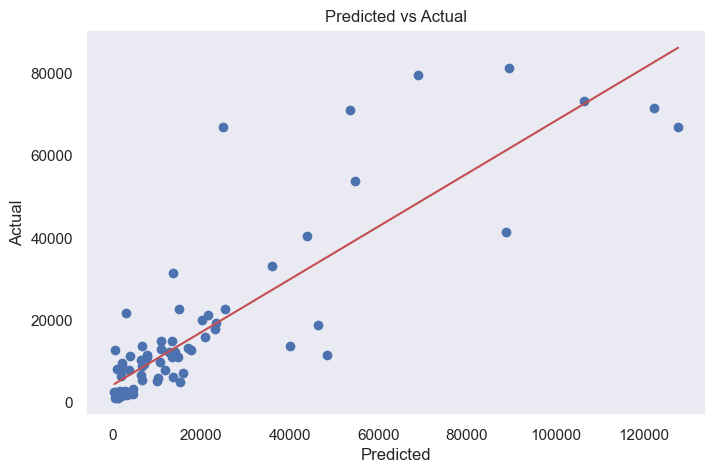

In [356]:
model6 = model_to_use("GBR")
model7.fit(X_train_n, y_train)
evaluate(model7)

## Conclusion:

In [ ]:
In this project, I developed an integrated machine learning framework for e-commerce price prediction and usability analysis using feature selection techniques.

Six machine learning models were evaluated and compared:

1. Decision Tree Regressor (DT) achieved a perfect Train R² score of 1.0, but its Test R² score dropped to 0.73, indicating significant overfitting despite a training 
   error (MSE) of 0.0.

2. Random Forest Regressor (RF) provided a more balanced performance, with a Train R² of 0.96 and an improved Test R² of 0.75, along with lower test MSE, suggesting better
   generalization to unseen data.

3. XGBoost Regressor (XGBC) fit the training data almost perfectly (Train R² ≈ 1.0), but showed the lowest Test R² (0.69), revealing clear overfitting.

4. Linear Regression (LR) demonstrated moderate fitting, with a Train R² of 0.74 and the highest Test R² of 0.77 among all models, making it a surprisingly strong baseline.

5. K-Nearest Neighbors Regressor (KNN) had a Train R² of 0.74 and a Test R² of 0.68, reflecting weaker performance and higher test MSE compared to ensemble models.

6. Gradient Boosting Regressor (GBR) achieved strong training performance (Train R² = 0.96) but a slightly lower Test R² (0.73) than RF, indicating some level of overfitting
   but still relatively good generalization.

Overall Insights:
a. Random Forest (RF) consistently performed well across both training and test data, maintaining a balance between accuracy and generalization.

b. Linear Regression (LR) showed surprisingly strong results, suggesting that after feature selection, the relationship between features and price might be fairly linear.

c. Ensemble models (RF, GBR) generally outperformed simpler methods like KNN, emphasizing the importance of model complexity for capturing feature interactions.



# Recommendation:

In [ ]:
Thus, Random Forest is recommended as the core model for the integrated machine learning framework,
                                                    
providing reliable price prediction while maintaining usability across different e-commerce datasets.

Further improvements could include hyperparameter tuning, cross-validation, and additional feature

engineering to enhance model robustness and prediction accuracy.